In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, t
%matplotlib inline
c = .7, .7, .7

In [2]:
stock = "AMZN"

In [3]:
data = pd.DataFrame.from_csv('AMZN.csv')

In [4]:
data.sort_index(inplace=True)

In [5]:
data

,AMZN
Date,
2013-01-03,258.480011
2013-01-04,259.149994
2013-01-07,268.459991
2013-01-08,266.380005
2013-01-09,266.350006
2013-01-10,265.339996
2013-01-11,267.940002
2013-01-14,272.730011
2013-01-15,271.899994


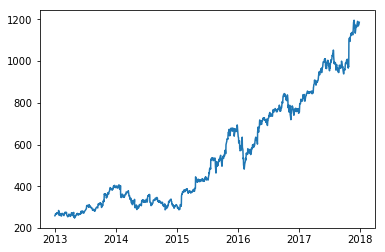

In [6]:
plt.plot(data)

In [7]:
data.tail()

,AMZN
Date,
2017-12-21,1174.760010
2017-12-22,1168.359985
2017-12-26,1176.760010
2017-12-27,1182.260010
2017-12-28,1186.099976


In [8]:
#[_] (a single underscore) : stores previous output, like Python’s default interpreter.

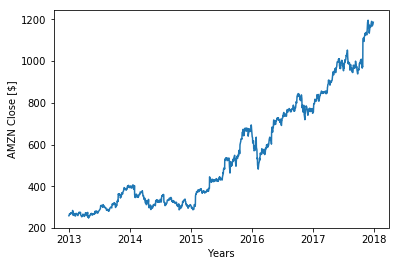

In [9]:
plt.plot(data)
plt.xlabel("Years")
plt.ylabel("AMZN Close [$]")

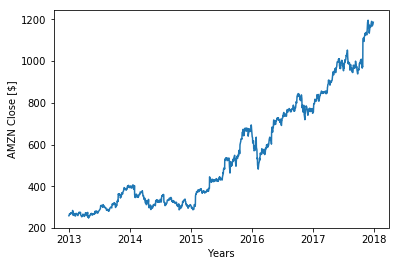

In [10]:
_ = plt.plot(data)
_ = plt.xlabel("Years")
_ = plt.ylabel("AMZN Close [$]")

In [11]:
cp = data.values
cp

array([[  258.480011],
       [  259.149994],
       [  268.459991],
       ..., 
       [ 1176.76001 ],
       [ 1182.26001 ],
       [ 1186.099976]])

In [12]:
len(cp)

1257

In [13]:
# return-series
ret = cp[1:]/cp[0:-1] - 1

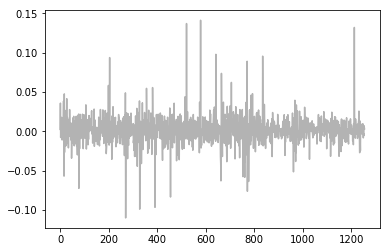

In [14]:
_ = plt.plot(ret, color=(0.7, 0.7, 0.7))


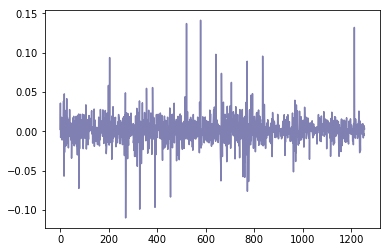

In [15]:
plt.plot(ret, color=(0.5, 0.5, 0.7))



In [16]:
ret.shape

(1256, 1)

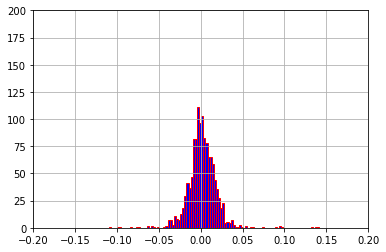

In [17]:
_ = plt.hist(ret, bins=100, color='b', edgecolor='r')
_ = plt.xlim([-0.2, 0.2])
_ = plt.ylim([0, 200])
_ = plt.grid("on")

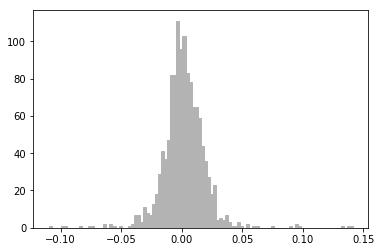

In [18]:
_ = plt.hist(ret, bins=100, color=c, edgecolor=c)

In [19]:
mu, sig = norm.fit(ret) # pick mean, sta

In [20]:
dof, mu2, sig2 = t.fit(ret) 

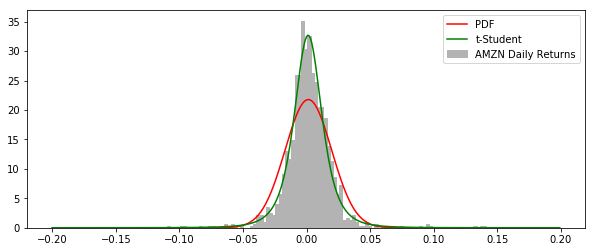

In [21]:
plt.figure(figsize=(10, 4)) #Outlook of the shape
plt.hist(ret, bins=100, color=c, edgecolor=c, normed=True, label="AMZN Daily Returns")

x = np.arange(-0.2, 0.2, 0.001)
pdf = norm.pdf(x, loc=mu, scale=sig)
pdf2 = t.pdf(x, dof, loc=mu2, scale=sig2)

plt.plot(x, pdf, 'r', label="PDF")
plt.plot(x, pdf2, 'g', label="t-Student")
plt.legend(loc="best")


In [22]:
np.sum(pdf*0.001)

0.99999999999999933

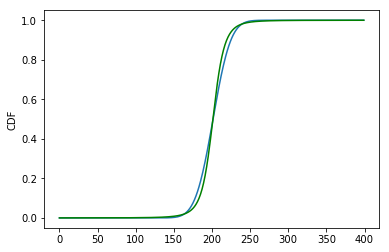

In [23]:
plt.plot(norm.cdf(x, loc=mu, scale=sig))
plt.plot(t.cdf(x, dof, loc=mu2, scale=sig2), 'g')
plt.ylabel("CDF")